# Task 1: Introduction

We aim to build and train a model that takes a handwritten digit image as input and predicts its corresponding class label (i.e., the digit itself).

![Hand Written Digits Classification](Images/1_1.png)

In [1]:
import tensorflow as tf

#tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.19.0


# Task 2: The Dataset
### Import MNIST

In [2]:
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
# The dataset is split into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shape of the imported data

In [3]:
print('Training data shape:', x_train.shape, y_train.shape)
print('Testing data shape:', x_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


### Plotting the Image Examples

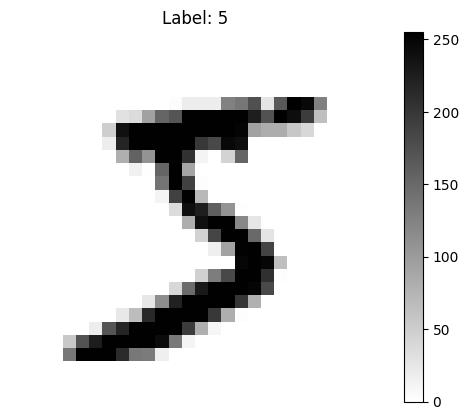

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

# Display the first images in the training set
plt.imshow(x_train[0], cmap='binary') # Using binary colormap for better visibility
plt.title(f'Label: {y_train[0]}') # Displaying the label of the first image
plt.colorbar() # Adding a color bar to indicate pixel values
plt.axis('off') # Hiding the axes
plt.show()

### Display Labels

In [5]:
print(y_train[0]) # Display the label of the first image

5


# Task 3: One Hot Encoding
After encoding, each label is transformed into a 10-element list (one-hot encoded), where the index corresponding to the digit class is set to 1, and all other positions are 0.:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [6]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

### Validated Shapes

In [7]:
print('y_train encoded shape:', y_train_encoded.shape)
print('y_test encoded shape:', y_test_encoded.shape)

y_train encoded shape: (60000, 10)
y_test encoded shape: (10000, 10)


### Display Encoded Lables

In [8]:
print(y_train_encoded[0]) # Display the one-hot encoded label of the first image

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Task 4: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors|

In [9]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784)) # Reshape to (60000, 784)
x_test_reshaped = np.reshape(x_test, (10000, 784)) # Reshape to (10000, 784)

# Display the reshaped data shapes
print('x_train reshaped shape:', x_train_reshaped.shape)
print('x_test reshaped shape:', x_test_reshaped.shape)

x_train reshaped shape: (60000, 784)
x_test reshaped shape: (10000, 784)


### Display Pixel Values

In [10]:
print(set(x_train_reshaped[0])) # Display the unique pixel values of the first image
print(set([int(x) for x in x_train_reshaped[0]])) # Display the unique pixel values of the first image as integers

{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(9), np.uint8(11), np.uint8(14), np.uint8(16), np.uint8(18), np.uint8(23), np.uint8(24), np.uint8(25), np.uint8(26), np.uint8(27), np.uint8(30), np.uint8(35), np.uint8(36), np.uint8(39), np.uint8(43), np.uint8(45), np.uint8(46), np.uint8(49), np.uint8(55), np.uint8(56), np.uint8(64), np.uint8(66), np.uint8(70), np.uint8(78), np.uint8(80), np.uint8(81), np.uint8(82), np.uint8(90), np.uint8(93), np.uint8(94), np.uint8(107), np.uint8(108), np.uint8(114), np.uint8(119), np.uint8(126), np.uint8(127), np.uint8(130), np.uint8(132), np.uint8(133), np.uint8(135), np.uint8(136), np.uint8(139), np.uint8(148), np.uint8(150), np.uint8(154), np.uint8(156), np.uint8(160), np.uint8(166), np.uint8(170), np.uint8(171), np.uint8(172), np.uint8(175), np.uint8(182), np.uint8(183), np.uint8(186), np.uint8(187), np.uint8(190), np.uint8(195), np.uint8(198), np.uint8(201), np.uint8(205), np.uint8(207), np.uint8(212), np.uint8(213), np.uint8(219), np.

### Data Normalization

In [11]:
x_mean = np.mean(x_train_reshaped) # Calculate the mean of the training data
x_std = np.std(x_train_reshaped) # Calculate the standard deviation of the training data

epsolon = 1e-10 # Small value to avoid division by zero

# Normalize the training and testing data
x_train_normalized = (x_train_reshaped - x_mean) / (x_std + epsolon) # Normalize the training data
x_test_normalized = (x_test_reshaped - x_mean) / (x_std + epsolon) # Normalize the testing data

### Displaying Normalized Pixel Values

In [12]:
print(set(x_train_normalized[0])) # Display the unique pixel values of the first normalized image
print(set([float(x) for x in x_train_normalized[0]])) # Display the unique pixel values of the first normalized image as floats

{np.float64(-0.38589016215482896), np.float64(1.306921966983251), np.float64(1.17964285952926), np.float64(1.803310486053816), np.float64(1.6887592893452241), np.float64(2.8215433456857437), np.float64(2.719720059722551), np.float64(1.1923707702746593), np.float64(1.7396709323268205), np.float64(2.057868700961798), np.float64(2.3633385588513764), np.float64(2.096052433197995), np.float64(1.7651267538176187), np.float64(2.7960875241949457), np.float64(2.7451758812133495), np.float64(2.45243393406917), np.float64(0.02140298169794222), np.float64(-0.22042732246464067), np.float64(1.2305545025108566), np.float64(0.2759611966059242), np.float64(2.210603629906587), np.float64(2.6560805059955555), np.float64(2.6051688630139593), np.float64(-0.4240738943910262), np.float64(0.4668798577869107), np.float64(0.1486820891519332), np.float64(0.3905123933145161), np.float64(1.0905474843114664), np.float64(-0.09314821501064967), np.float64(1.4851127174188385), np.float64(2.7579037919587486), np.float6

# Task 5: Creating a Model
### Creating the Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential(
    [
        Dense(128, activation='relu', input_shape=(784,)), # Add a dense layer with 128 units and ReLU activation
        Dense(128, activation='relu'), # Add another dense layer with 128 units and ReLU activation
        Dense(10, activation='softmax') # Add an output layer with 10 units (for 10 classes) and softmax activation
    ]
)

f:\GitHub_Codes\Image-Classification-With-Tensorflow\Image-Classification-With-Tensorflow\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling the Model & getting the Summary

In [14]:
model.compile(
    optimizer='sgd', # Use sgd optimizer
    loss='categorical_crossentropy', # Use categorical crossentropy loss function
    metrics=['accuracy'] # Track accuracy as a metric
)

model.summary() # Display the model summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Task 6: Training the Model

### Training the Model

In [15]:
model.fit(
    x_train_normalized, # Training data
    y_train_encoded, # Training labels
    epochs=10, # Number of epochs to train
    batch_size=32, # Batch size for training
    validation_data=(x_test_normalized, y_test_encoded) # Validation data
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8208 - loss: 0.6074 - val_accuracy: 0.9395 - val_loss: 0.2037
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9445 - loss: 0.1926 - val_accuracy: 0.9535 - val_loss: 0.1488
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9589 - loss: 0.1398 - val_accuracy: 0.9605 - val_loss: 0.1285
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9681 - loss: 0.1120 - val_accuracy: 0.9645 - val_loss: 0.1138
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9723 - loss: 0.0953 - val_accuracy: 0.9687 - val_loss: 0.1040
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9769 - loss: 0.0774 - val_accuracy: 0.9701 - val_loss: 0.0960
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9805 - loss: 0.0697 - val_accuracy: 0.9715 - val_loss: 0.0927
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9814 - loss: 0.0637 - 

### Evaluating the Model

In [16]:
loss, accuracy = model.evaluate(
    x_test_normalized, # Testing data
    y_test_encoded # Testing labels
)

print(f'Test loss: {loss*100:.2f}, Test accuracy: {accuracy*100:.2f}') # Display the test loss and accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.0983
Test loss: 8.33, Test accuracy: 97.48


# Task 7: Predictions

### Predictions on Test Set

In [17]:
predictions = model.predict(x_test_normalized) # Make predictions on the test data
print('Predictions shape:', predictions.shape) # Display the shape of the predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
Predictions shape: (10000, 10)


### Plotting the Results

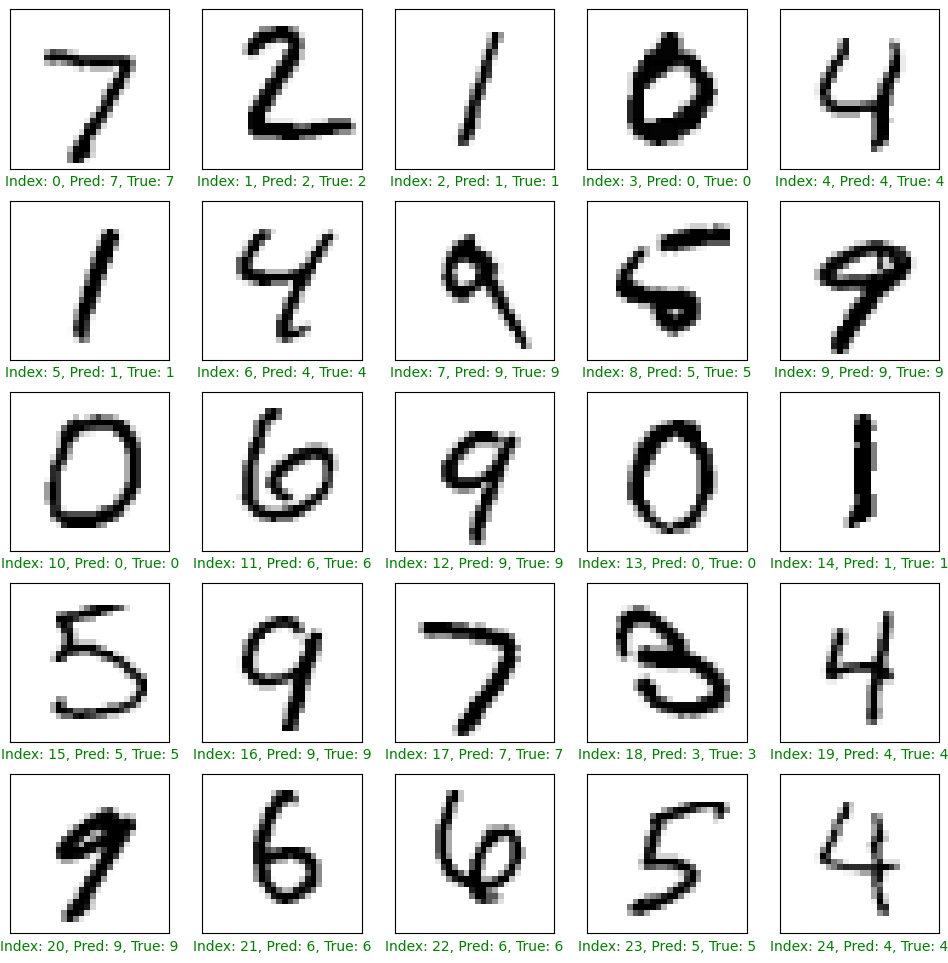

In [18]:
plt.figure(figsize=(12,12)) # Set the figure size for displaying multiple images

for i in range(25): # Loop to display 25 images
    plt.subplot(5, 5, i + 1) # Create a subplot for each image
    plt.xticks([]) # Hide x-axis ticks
    plt.yticks([]) # Hide y-axis ticks
    plt.grid(False) # Disable grid

    pred= np.argmax(predictions[i]) # Get the predicted label
    gt= y_test[i] # Get the true label

    color = 'green' if pred == gt else 'red' # Set color based on whether prediction is correct

    plt.xlabel(f'Index: {i}, Pred: {pred}, True: {gt}', color=color) # Display predicted and true labels
    plt.imshow(x_test[i], cmap='binary') # Display the original image


plt.show() # Show the plot with all images